# Mann-Kendall's test: detecting trends

Mann-Kendall trend test is used to perceive statistically significant decreasing or increasing trend in long term temporal data. It is a nonparametric test, so it is applicable to all distributions. 

References:
*  Wang F, Shao W, Yu H, Kan G, He X, Zhang D, Ren M and Wang G (2020) Re-evaluation of the Power of the Mann-Kendall Test for Detecting Monotonic Trends in Hydrometeorological Time Series. Front. Earth Sci. 8:14. doi: 10.3389/feart.2020.00014
* Prashanth Khambhammettu: ”Mann-Kendall Analysis for the Fort Ord Site”, HydroGeoLogic, Inc.-OU-1 2004 Annual Groundwater Monitoring Report-Former Fort Ord, California, 2005 (last accessed 03/11/2021 at https://www.statisticshowto.com/wp-content/uploads/2016/08/Mann-Kendall-Analysis-1.pdf)

### Imports

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Functions

For computing the MK's statistic we need to compute indicator function $sgn(y_i−y_j)$ :

$\begin{split}sgn(y_i - y_j) &=
    \begin{cases}
                    1,  & y_i - y_j > 0\\
                    0,  & y_i - y_j = 0\\
                    -1, & y_i - y_j < 0
    \end{cases},\end{split}$

which tells us whether the difference between the measurements at time i and j are positive, negative or zero.

In [2]:
def sgn(yi,yj, precision=3):
    epsilon = 10**-precision
    diff = yi - yj
    if diff > epsilon:
        return 1
    elif diff < - epsilon:
        return -1
    else:
        return 0

Let $y_1, y_2, .., y_n$   represent $n$ data points where $y_j$  represents the data point at time $j$.  Then the Mann-Kendall statistic ($S$) is given by:
$$ S = \sum_{k=1}^{n-1} \sum_{j=k+1}^{n} sgn(y_j - y_k)$$

In [3]:
def MK_statistic(y, precision=3):
    n = len(y)
    mean = 0
    for i in range(n-1):
        for j in range(i+1,n):
            mean +=sgn(y[j],y[i], precision)
    return mean

The null hypothesis, H0, states that there is no monotonic trend, and this is tested against one of three possible alternative hypotheses, Ha: (i) there is an upward monotonic trend, (ii) there is a downward monotonic trend, or (iii) there is either an upward monotonic trend or a downward monotonic trend. A  very  high  positive  value  of  S  is  an  indicator  of  an  increasing  trend,  and  a  very  low  negative value indicates a decreasing trend.

**Assumptions**
1. In the absence of a trend, the data are independently and identically distributed (iid).

2. The measurements represent the true states of the observables at the times of measurements.

3. The methods used for sample collection, instrumental measurements and data handling are unbiased

Once we have the test statistic, we need to compute the probability associated with  $S$  and  the  sample  size,  $n$,  to  statistically  quantify  the  significance  of  the  trend. To do so, we follow the next steps:
1. Compute the variance of $S$ as:
$$ VAR(S) = \frac{1}{18} \left[n(n-1)(2n+5)- \sum_{p=1}^{g} t_p (t_p-1)(2t_p+5) \right]$$

In [4]:
def var_S(y, precision=3):
    n = len(y)
    unique, t = np.unique(np.round(y,precision), return_counts=True)
    g = len(unique)
    sum_unique = 0
    for p in range(g):
        sum_unique += t[p]*(t[p]-1)*(2*t[p]+5)
    return (n*(n-1)*(2*n+5)-sum_unique)/18

2. Compute a normalized test statistic Z from Mann-Kendall's test statistic using the following formula:


$\begin{split}Z &=
    \begin{cases}
                    \frac{S-1}{[VAR(S)]^{1/2}},  & S > 0\\
                    \frac{S+1}{[VAR(S)]^{1/2}},  & S < 0\\
                    0,  & S = 0\\
    \end{cases},\end{split}$

In [5]:
def MK_standard(S, var, precision=3):
    epsilon = 10**-precision
    if S > epsilon:
        return (S -1)/np.sqrt(var)
    elif S < - epsilon:
        return (S+1)/np.sqrt(var)
    else:
        return 0

The standardized MK statistic Z follows the standard normal distribution with E(Z) = 0 and V(Z) = 1, and the null hypothesis (no trend) is rejected if the absolute value of Z is larger than the theoretical value 
$Z_{1−\alpha/2}$ (for two-tailed test). If we reject the null hypothesis, we can obtain the direction of the trend (increasing/decreasing) by inspecting the sign of the standardized Mann-Kendall test statistic Z.

In [6]:
def mk_test(y, x=None, alpha = 0.05):
    
    if x is None:
        x = np.arange(len(y))
    
    # Compute Mann Kendalls's test statistc
    S = MK_statistic(y)
    var = var_S(y)
    z = MK_standard(S, var)
    trend = abs(z) > stats.norm.ppf(1-alpha/2)

    if (z < 0) and trend:
        trend = 'decreasing'
    elif (z > 0) and trend:
        trend = 'increasing'
    else:
        trend = 'no trend'
    
    return trend

### Examples

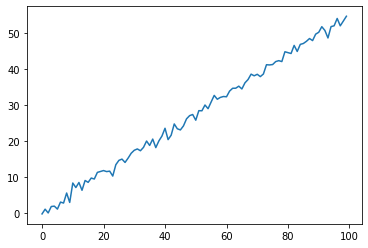

'increasing'

In [7]:
N = 100
y1 = np.random.normal(0,1,N)
breakpoint = np.random.randint(N)
slope = np.random.uniform(0,1)
y1 = y1 + slope*np.arange(N)
plt.plot(y1)
plt.show()
mk_test(y1)

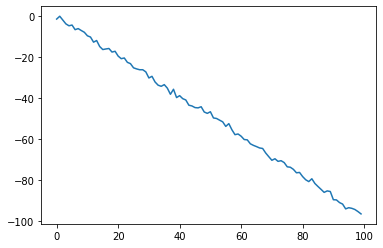

'decreasing'

In [8]:
N = 100
y2 = np.random.normal(0,1,N)
breakpoint = np.random.randint(N)
slope = -np.random.uniform(0.5,1)
y2 = y2 + slope*np.arange(N)
plt.plot(y2)
plt.show()
mk_test(y2)

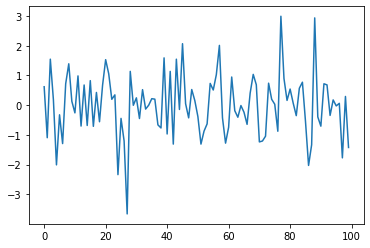

'no trend'

In [9]:
y3 = np.random.normal(0,1,N)
plt.plot(y3)
plt.show()
mk_test(y3)

References:
*  Wang F, Shao W, Yu H, Kan G, He X, Zhang D, Ren M and Wang G (2020) Re-evaluation of the Power of the Mann-Kendall Test for Detecting Monotonic Trends in Hydrometeorological Time Series. Front. Earth Sci. 8:14. doi: 10.3389/feart.2020.00014
* Prashanth Khambhammettu: ”Mann-Kendall Analysis for the Fort Ord Site”, HydroGeoLogic, Inc.-OU-1 2004 Annual Groundwater Monitoring Report-Former Fort Ord, California, 2005 (last accessed 03/11/2021 at https://www.statisticshowto.com/wp-content/uploads/2016/08/Mann-Kendall-Analysis-1.pdf)